In [1]:
# import required modules for this project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns 
import os

In [2]:
#Load csv file :
file_path ="/Users/sa15/Desktop/Phase2/FF.csv"

Financial =pd.read_csv(file_path)

#print out general information on this dataframe
Financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
#print out the first 5 rows of data
Financial.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#print out the summary statistics (mean, median, max, min, count) of all numeric columns
Financial.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
#Print out the column names.
Financial.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Count missing values per column
Financial.isnull().sum()  


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#Calculate the mean of 'amount'
Financial['amount'].mean

<bound method Series.mean of 0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64>

In [8]:
Financial['newbalanceOrig'].mean

<bound method Series.mean of 0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Name: newbalanceOrig, Length: 6362620, dtype: float64>

In [9]:
Financial['oldbalanceOrg'].mean

<bound method Series.mean of 0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 6362620, dtype: float64>

In [10]:
#Frequency table – Describes how often different values occur.
Financial['amount'].value_counts()

amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64

In [11]:
Fraud=Financial.value_counts("isFraud")
Fraud.to_frame()

,count
isFraud,
0,6354407
1,8213


In [12]:
Financial.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

## Univariate Exploratory Analysis(Single Variable Exploration)
## Histograms, boxplots, and barcharts of all available numeric columns.


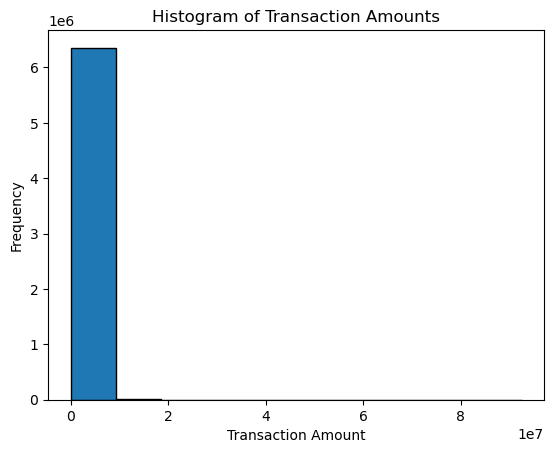

In [13]:
#Histogram for 'amount' column.The transaction amount can be a critical factor in identifying fraud. 
# Large transactions or unusual amounts may be indicative of fraudulent activity.
Financial.hist(column='amount', grid=False, edgecolor='black')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Transaction Amounts")
plt.show()

In [14]:
Financial['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

#Pie chart showing Distribution Of Transaction Types

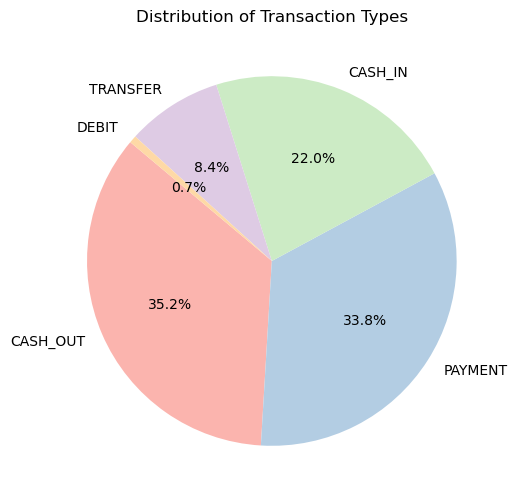

In [15]:
# Count the occurrences of each transaction type
type_counts = Financial['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Transaction Types')
plt.show()


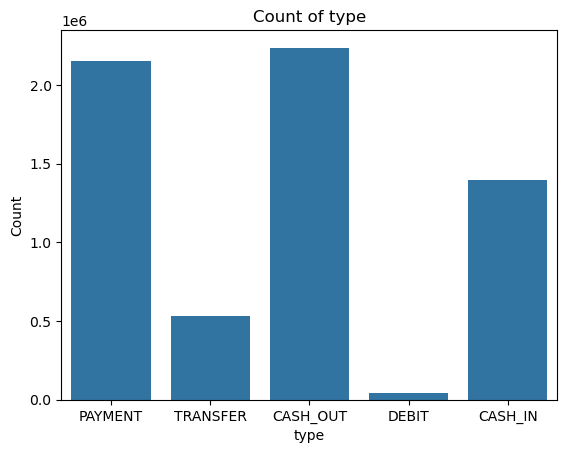

In [16]:
sns.countplot(data=Financial, x='type')
plt.xlabel('type')
plt.ylabel('Count')
plt.title('Count of type')
plt.show()

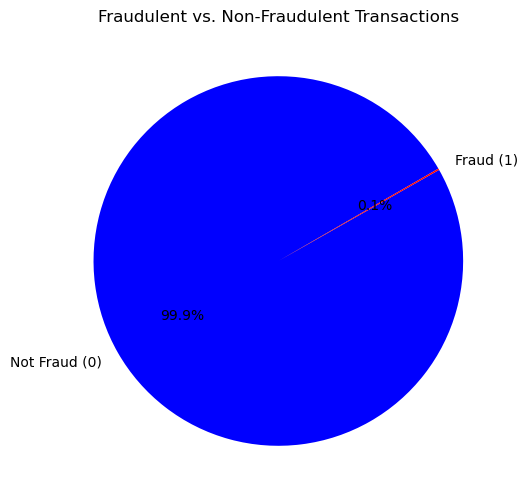

In [17]:

# fraudulent (1) and non-fraudulent (0) transactions
fraud_counts = Financial['isFraud'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', startangle=30, colors=['blue', 'red'])
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


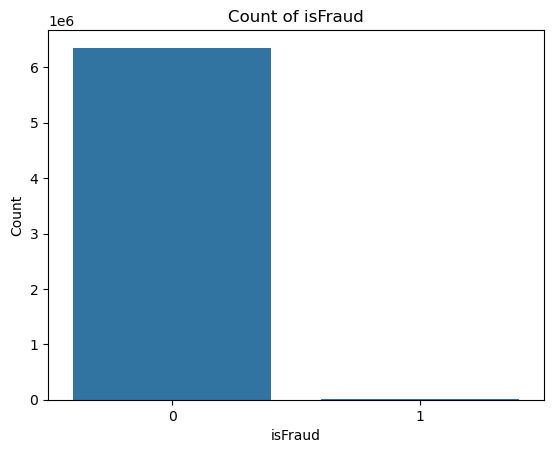

In [18]:
sns.countplot(data=Financial, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Count of isFraud')
plt.show()

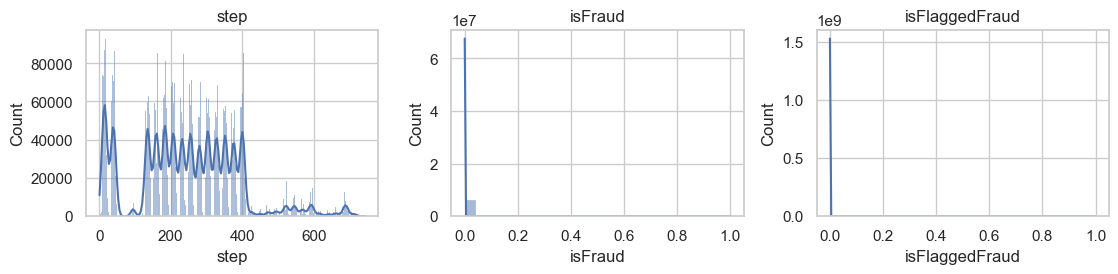

In [19]:
sns.set(style="whitegrid")

# Selecting numerical columns for distribution plots
numerical_cols = Financial.select_dtypes(include=['int64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(Financial[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

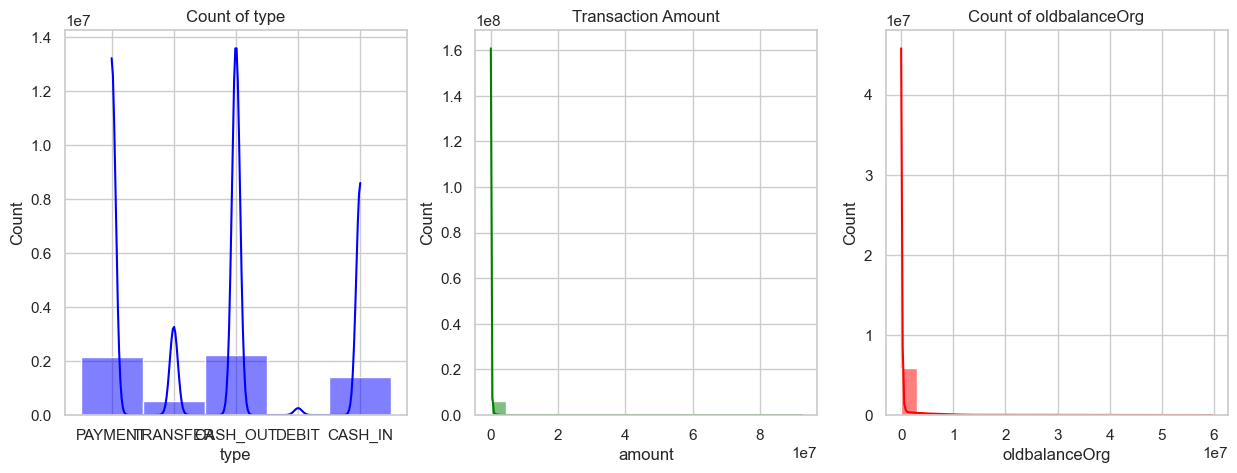

In [20]:

sns.set(style="whitegrid")

# Histograms of type,amount and isfraud
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(Financial['type'], kde=True, bins=20, color='blue')
plt.title('Count of type')

plt.subplot(1, 3, 2)
sns.histplot(Financial['amount'], kde=True, bins=20, color='green')
plt.title('Transaction Amount')

plt.subplot(1, 3, 3)
sns.histplot(Financial['oldbalanceOrg'], kde=True, bins=20, color='red')
plt.title('Count of oldbalanceOrg')

plt.show()

#Bivariate Analysis:Relationship between 2 columns.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


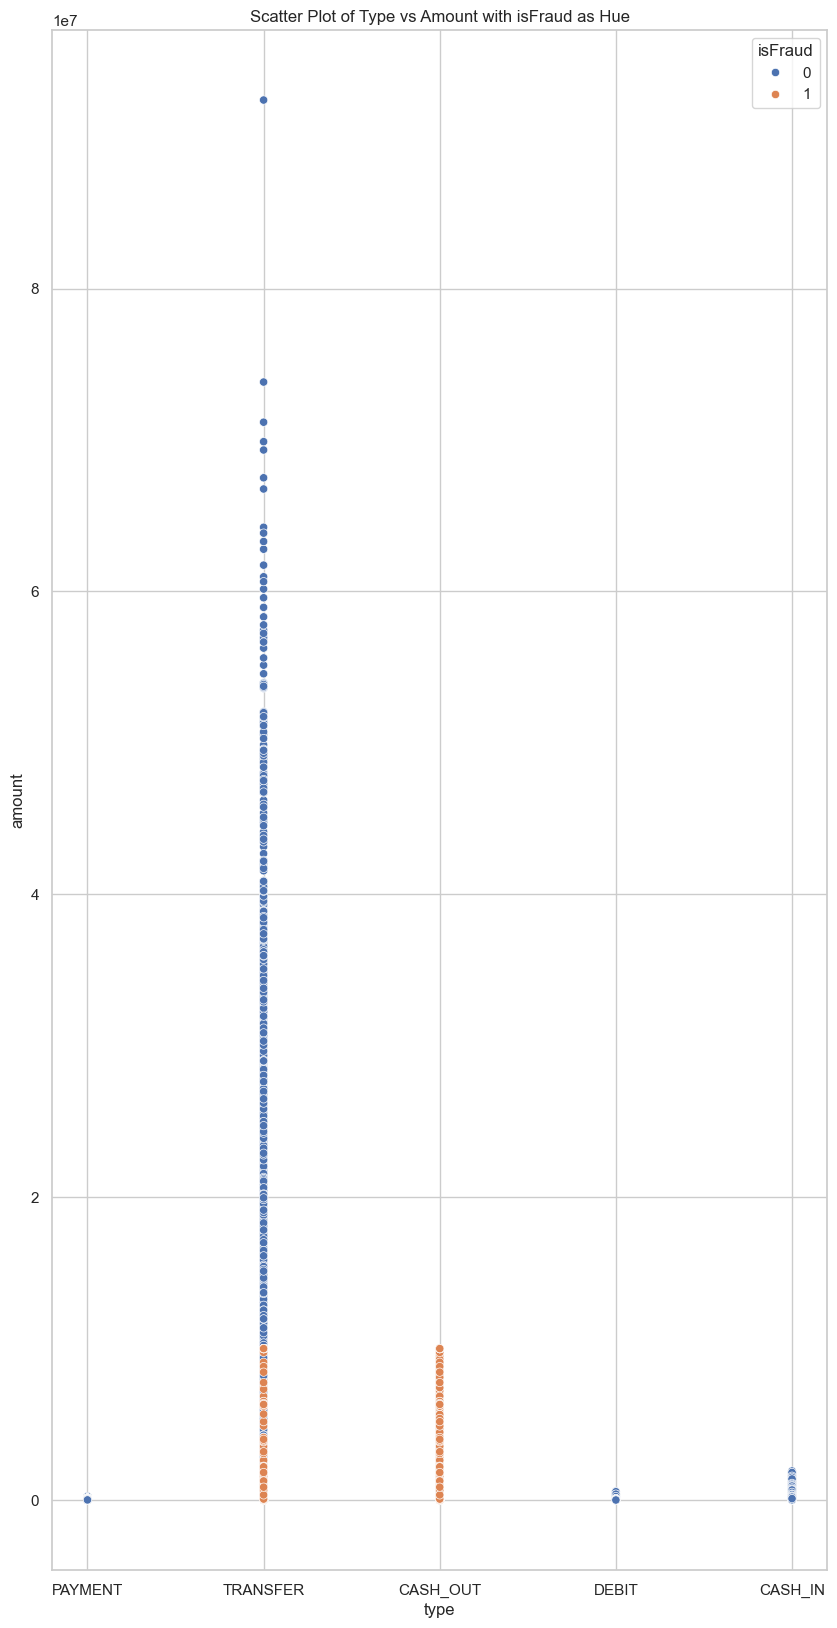

In [21]:
#type vs. amount with hue of isFraud

plt.figure(figsize=(10, 20))
sns.scatterplot(x='type', y='amount', hue='isFraud', data=Financial)
plt.title('Scatter Plot of Type vs Amount with isFraud as Hue')
plt.show()

### In the above chart, we are able to see how there are fraudulent cases within the CASH_OUT and TRANSFER types.

In [22]:
# sample sizing data for smoother processing 
Financial_new_df = Financial.sample(n=1000000)

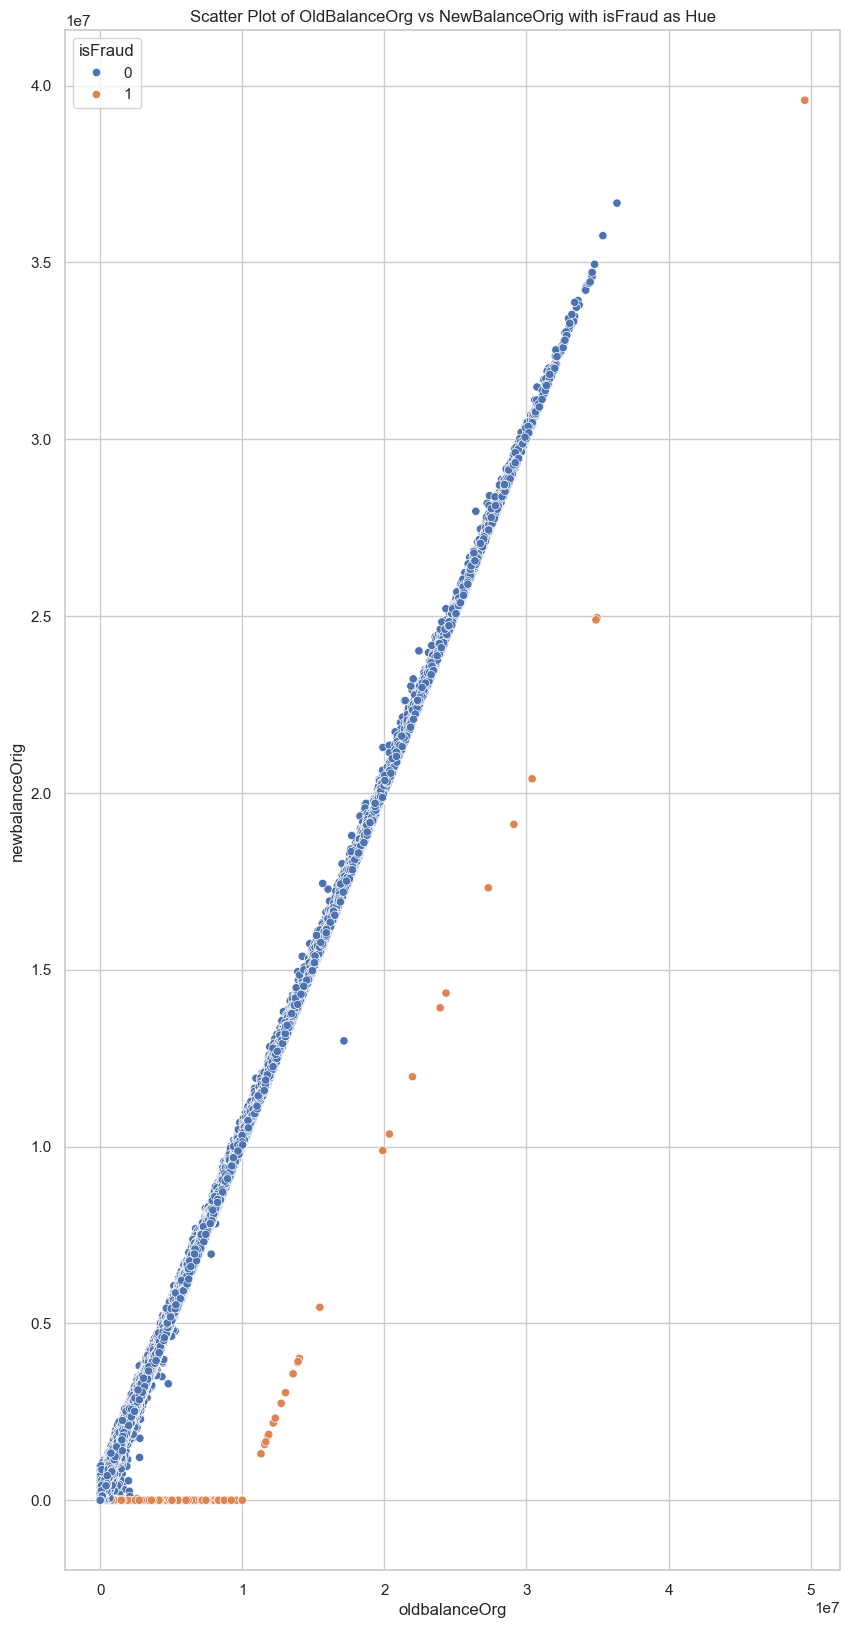

In [23]:
#OldBalanceOrg vs. NewBalanceOrig with hue of isFraud 

plt.figure(figsize=(10, 20))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=Financial_new_df)
plt.title('Scatter Plot of OldBalanceOrg vs NewBalanceOrig with isFraud as Hue')
plt.show()

### From the above chart  when there's no fraud, the new and old balances of the origin accounts tend to move together—meaning as money is spent or received, the balance updates normally. But in fraud cases, the balance often stays the same mostly.

## ScatterPlot with hue:

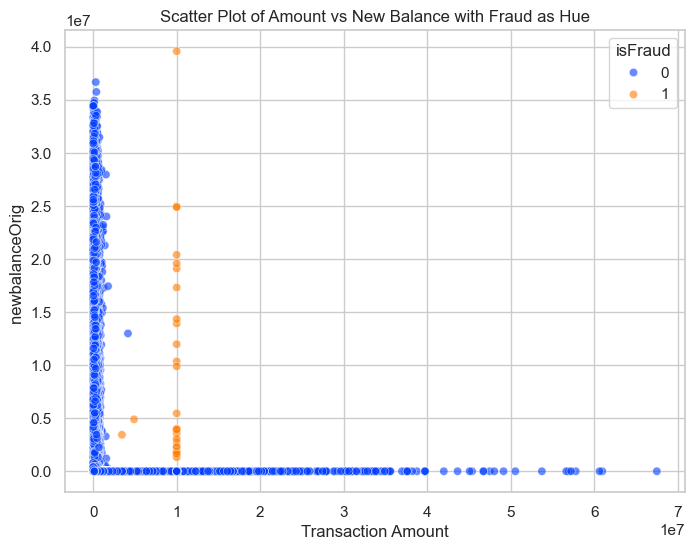

In [24]:

plt.figure(figsize=(8, 6))

# Scatter plot for amount vs newbalanceOrig with fraud status as hue
sns.scatterplot(x="amount", y="newbalanceOrig", hue="isFraud", data=Financial_new_df, palette="bright", alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("newbalanceOrig ")
plt.title("Scatter Plot of Amount vs New Balance with Fraud as Hue")
plt.show()


Multivariate Analysis: Shows the relationship between multiple columns

<function matplotlib.pyplot.show(close=None, block=None)>

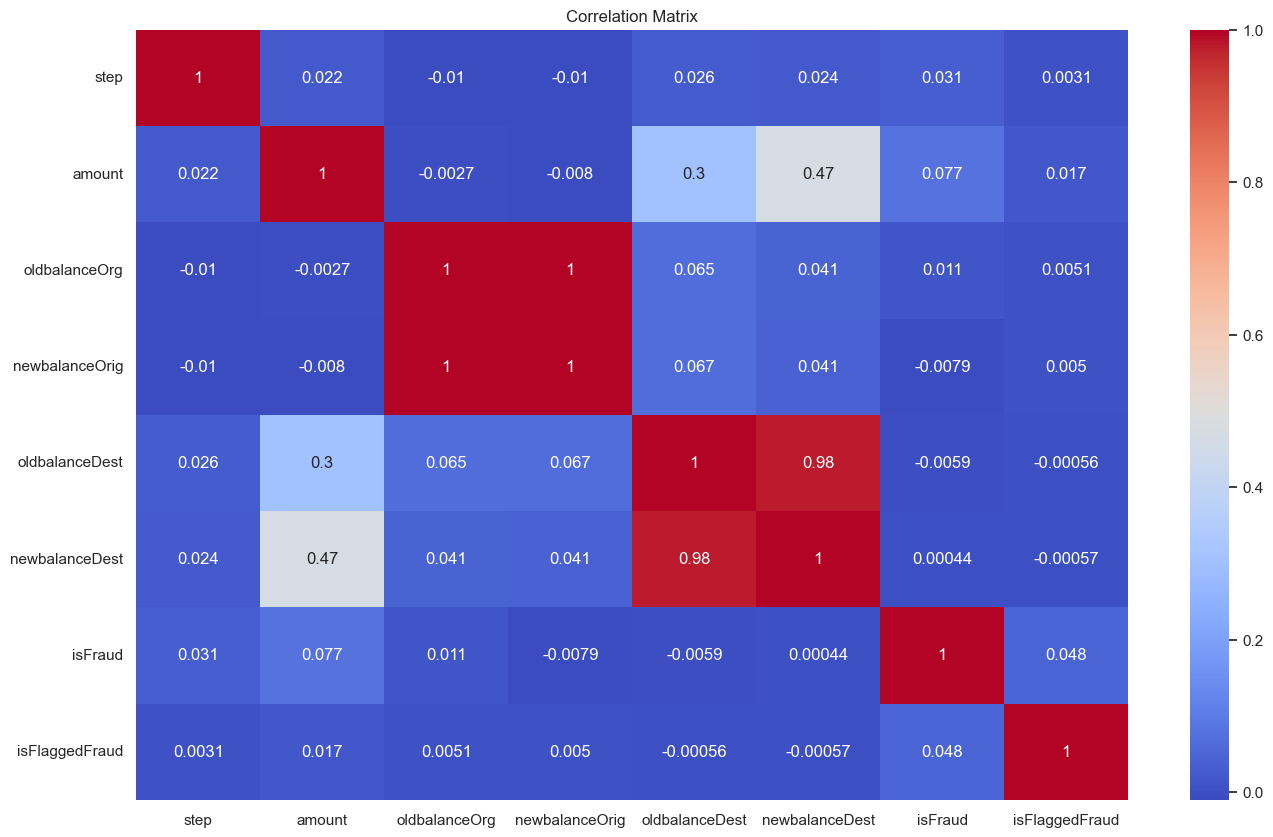

In [25]:
#creating a correlation matrix with only the numeric columns within the dataset

correlation_matrix = Financial_new_df.corr(numeric_only= True)

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show